# Analysis of catering establishments in Moscow

# Table of Contents 

* [Introduction](#num1)
* [Data description](#num2)
* [1. Loading data](#num3)
* [2. Data preprocessing](#num4)
* [3. Exploratory data analysis](#num5)
* [4. Detailing the study: opening a coffee shop](#num6)
* [5. General conclusion](#num7)

<a id="num1"></a>
## Introduction

**Project Objective:** to prepare a study of the Moscow market, find interesting features and present the results obtained, which in the future will help in choosing a suitable location for investors.
 
**Objectives:**

1. Download data and learn general information;
2. Perform preprocessing of the data;
3. Perform data analysis;
4. To investigate in detail the possibility of opening a coffee shop in Moscow.

<a id="num2"></a>
## Data description

We have available a dataset with catering establishments in Moscow, based on data from Yandex Maps and Yandex Business for the summer of 2022.

* The `moscow_places.csv` dataset consists of the following columns:

`name` - the name of the establishment;

`address` - address of the establishment;

`category` - the category of the establishment, e.g. "cafe", "pizzeria" or "coffee shop";

`hours` - information about days and hours of operation;

`lat` - latitude of the geographical point where the institution is located;

`lng` - longitude of the geographical point where the institution is located;

`rating` - rating of the institution according to user ratings in Yandex Maps (the highest rating is 5.0);

`price` - price category in the institution, for example "average", "below average", "above average" and so on;

`avg_bill` - a string that stores the average cost of an order as a range, for example:

1. "Average bill: 1000-1500 ₽";
2. "Price of a cup of cappuccino: 130-220 ₽";
3. "Price of a glass of beer: 400-600 ₽".
etc;

`middle_avg_bill` - a number with an estimate of the average check, which is specified only for values from the avg_bill column that begin with the "Average Bill" substring:

1. If the row specifies a price range of two values, the column will include the median of those two values.
2. If the row specifies a single number, a price with no range, the column will include that number.
3. If there is no value or it doesn't start with the substring "average bill", then nothing will be included in the column.

`middle_coffee_cup` - a number with a price per cup of cappuccino that is specified only for values from the avg_bill column that begin with the "Price per cup of cappuccino" substring:

1. If the row specifies a price range of two values, the column will include the median of those two values.
2. If the row specifies a single number, a price with no range, the column will include that number.
3. If there is no value or it does not start with the "Price of one cup of cappuccino" substring, the column will not include anything.

`chain` - a number expressed as 0 or 1, which indicates if the establishment is a chain (errors may occur for small chains):

0 - the institution is not networked

1 - the institution is networked

`district` - administrative district in which the establishment is located, e.g. Central Administrative District;

`seats` - number of seats.




<a id="num3"></a>
## 1. Loading data

In [1]:
# Data handling libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from folium import Choropleth, Map
from folium import Marker
from folium.plugins import MarkerCluster

# Other libraries
import json

C:\Users\Shiro\AppData\Local\Temp\ipykernel_18948\1951784334.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB
None


name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours   lat   lng  rating  \
0                             ежедневно, 10:00–22:00 55.88 37.48    5.00   
1                             ежедневно, 10:00–22:00 55.88 37.48    4.50   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00... 55.89 37.53    4.60   
3                             ежедневно, 09:00–22:00 55.88 37.49    5.00   
4                             ежедневно, 10:00–22:00 55.88 37.45    5.00   

           price                       avg_bill  middle_avg_bill  \
0            NaN                            NaN              NaN   
1  выше среднего       Средний счёт:1500–1600 ₽         1,550.00   
2        средние         Средний счёт:от 1000 ₽         1,000.00   
3            NaN  Цена чашки капучино:155–185 ₽              NaN   
4        средние         Средний счёт:400–600 ₽           500.00   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0   4.00  
2                NaN      0  45.00  
3             170.00      0    NaN  
4                NaN      1 148.00

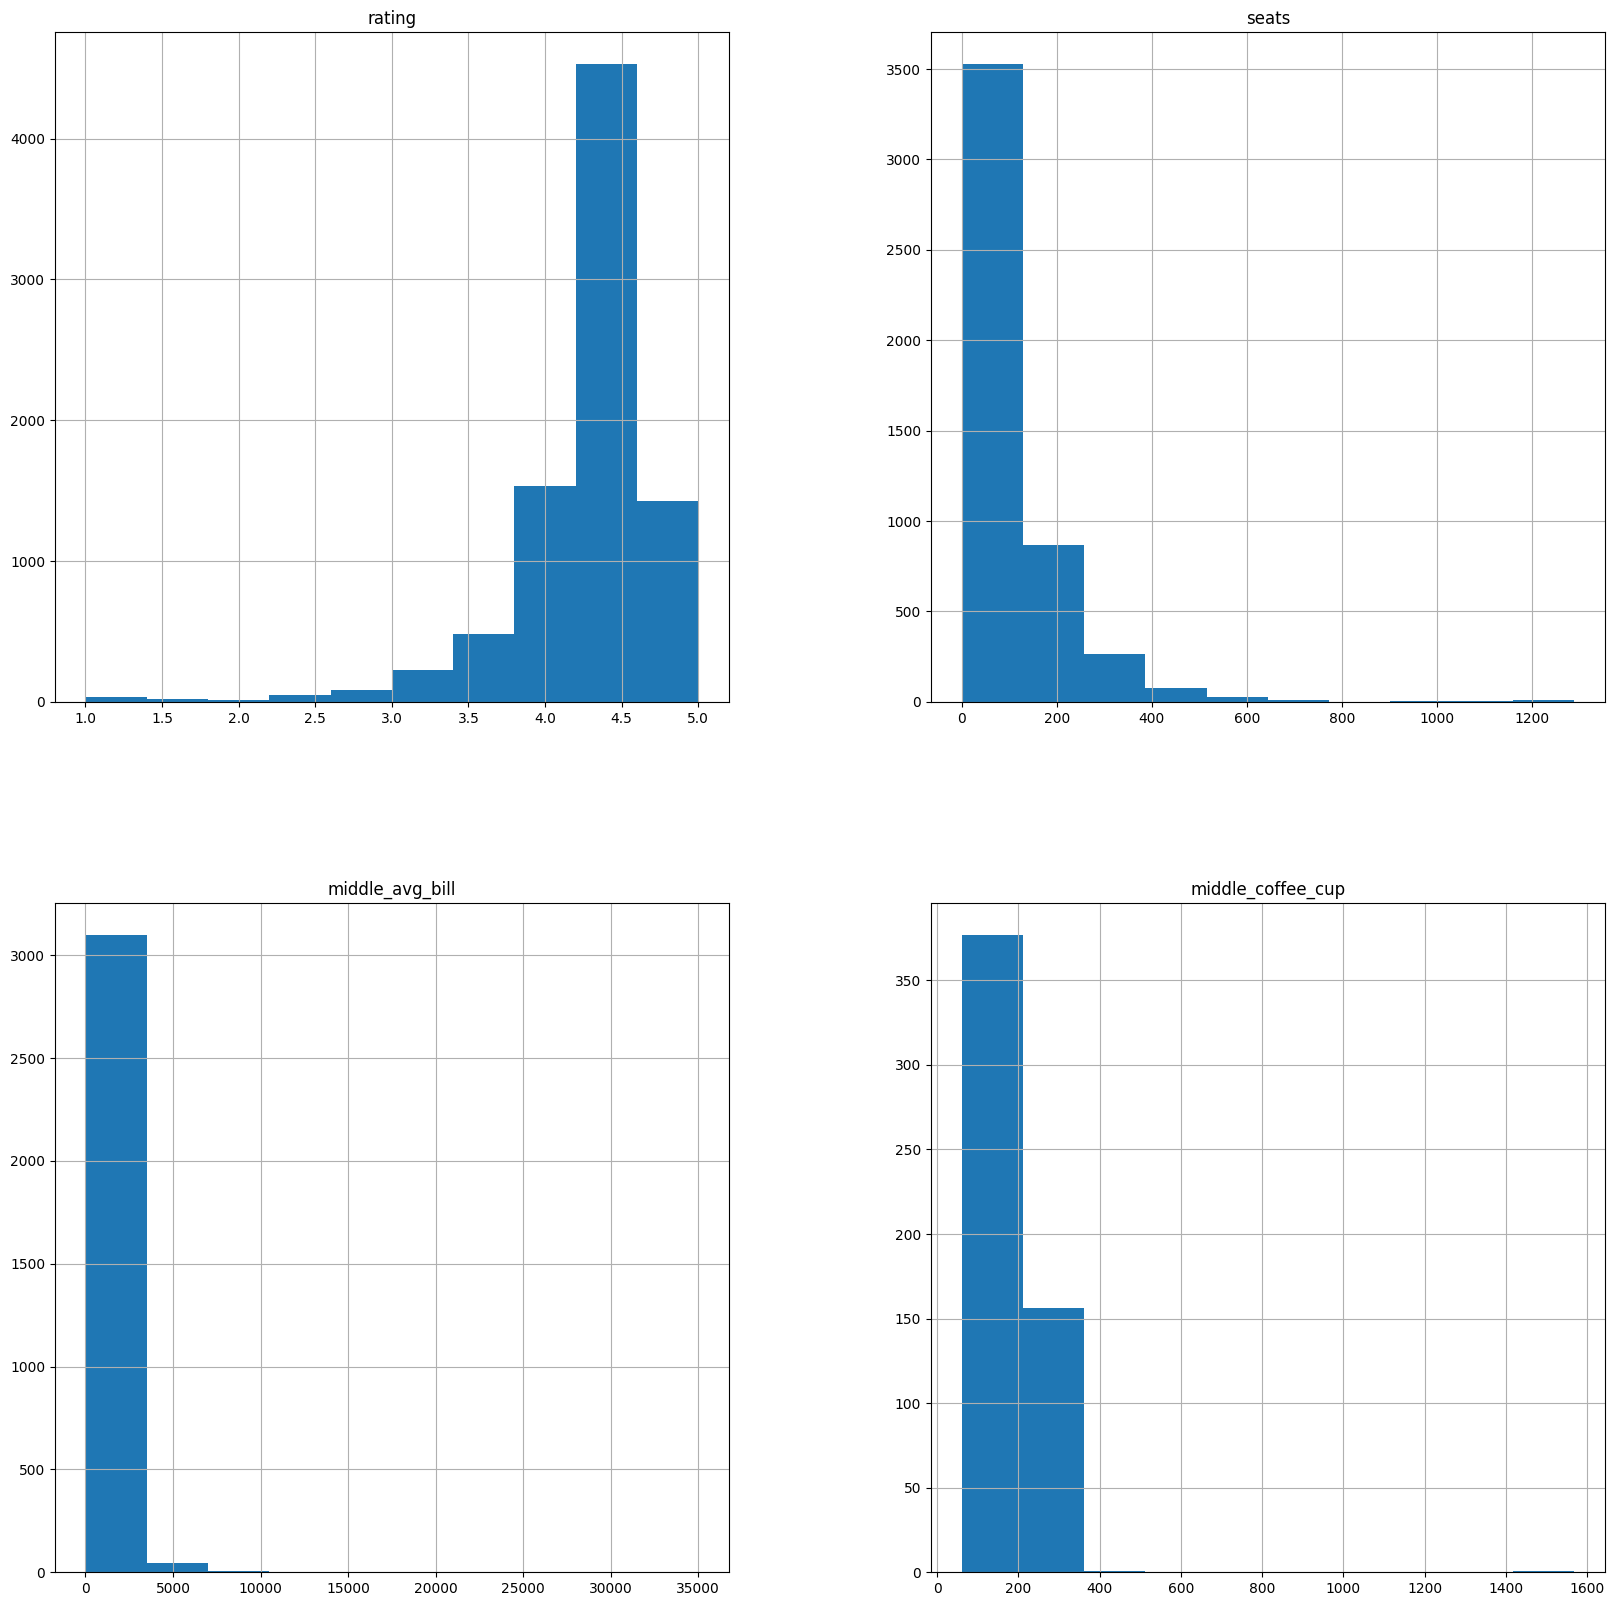

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Load data and display basic information
data = pd.read_csv('moscow_places.csv')
print(data.info())
display(data.head())

# List of numerical columns for which histogram makes sense
numerical_cols = numerical_cols = ['rating', 'seats', 'middle_avg_bill', 'middle_coffee_cup']

# Plot histograms for the selected columns only
data[numerical_cols].hist(figsize=(20, 20))
plt.show()

**Based on the information from the dataset, we can make the following observations:**

* The dataset contains information about 8406 catering establishments in Moscow, with each establishment characterized by 14 features (columns).

* Missing data: Some columns have missing data (`hours`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`, and `seats`). The degree of missingness varies across these columns. This needs to be taken into account during further data preprocessing and analysis.

* Data types: The dataset consists of both numerical and non-numerical (object/string) columns. Numerical columns are already in the suitable format for mathematical computations and visualizations. String fields (`category`, `address`, etc.) may require further examination and possibly preprocessing (e.g., removal of any odd characters or words, standardization in case of discrepancies in representation, etc.).

Overall, before moving onto further exploratory or predictive data analysis, a careful data cleaning and pre-processing step should be undertaken to handle missing values, possibly outliers, and potentially incorrect data.

<a id="num4"></a>
## 2. Data preprocessing

<a id="num4.1"></a>
### 2.1 Handling empty values

**Find and examine the missing values in the columns.**

In [3]:
# Identify missing values in each column
missing_values = data.isnull().sum()

# Print the result
print(missing_values)

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64


In [4]:
# Calculate percentage of missing values for each column
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Round the result to two decimal places and sort by value
missing_values_percentage = missing_values_percentage.round(2).sort_values(ascending=False)

# Convert series into DataFrame and rename columns for better readability
missing_values_percentage = missing_values_percentage.reset_index()
missing_values_percentage.columns = ['Columns', 'Percentage of Missing Values']

# Display DataFrame
display(missing_values_percentage)

Columns  Percentage of Missing Values
0   middle_coffee_cup                         93.64
1     middle_avg_bill                         62.54
2               price                         60.56
3            avg_bill                         54.60
4               seats                         42.96
5               hours                          6.38
6                name                          0.00
7            category                          0.00
8             address                          0.00
9            district                          0.00
10                lat                          0.00
11                lng                          0.00
12             rating                          0.00
13              chain                          0.00

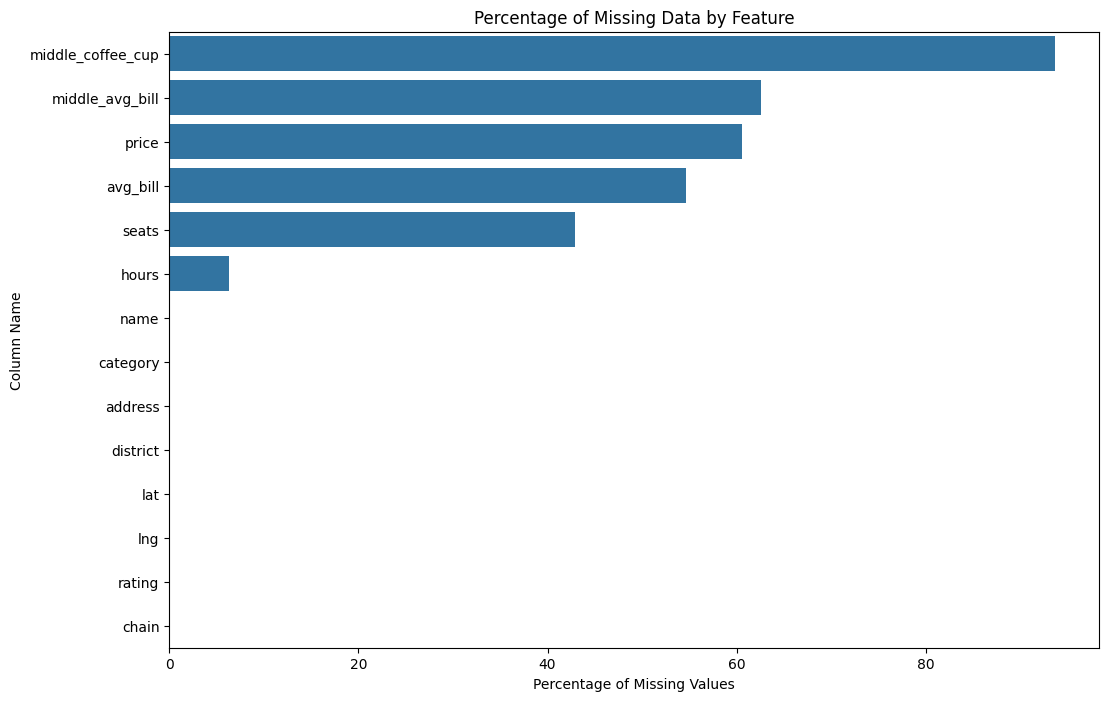

In [5]:
# Calculate the percentage of missing values
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Sort the series and convert to DataFrame
missing_values_df = missing_values_percentage.sort_values(ascending=False).reset_index()

# Rename the series for a better readability
missing_values_df.columns = ['Column Name', 'Percentage of Missing Values']

# Create a bar plot
plt.figure(figsize=(12,8))
sns.barplot(x='Percentage of Missing Values', y='Column Name', data=missing_values_df)
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column Name')
plt.title('Percentage of Missing Data by Feature')
plt.show()

**Let's investigate the reason for the large number of omissions in the `middle_coffee_cup` column.**

* `middle_coffee_cup` is a number with the price of one cup of cappuccino, which is specified only for the values from the `avg_bill` column starting with the "Price of one cup of cappuccino" substring.

This large number of omissions in this column is probably due to the category of the establishment. Let's see how many categories of establishments have filled data in the `middle_coffee_cup` column.

In [6]:
# Create a pivot table
number_of_establishments = data.pivot_table(index='category', 
                                  values=['name', 'middle_coffee_cup', 'middle_avg_bill', 'price', 'avg_bill'], 
                                  aggfunc='count')

# Sort by number of establishments having 'middle_coffee_cup' value
number_of_establishments.sort_values(by='middle_coffee_cup', ascending=False)

avg_bill  middle_avg_bill  middle_coffee_cup  name  price
category                                                                  
кофейня               721              200                521  1413    476
бар,паб               485              349                  6   765    494
кафе                  698              694                  4  2378    633
пиццерия              400              395                  3   633    311
быстрое питание       238              237                  1   603    190
булочная               53               53                  0   256     41
ресторан             1040             1040                  0  2043   1017
столовая              181              181                  0   315    153

**As per the given pivot table:**

1. The "кофейня" (meaning "coffee house") category has the most establishments specifying a coffee price (521 establishments), which makes sense as these are specifically coffee-focused establishments. Many have not specified coffee prices, potentially due to differences in raw data collection or not having a specific average coffee price.

2. "бар,паб" (meaning "bar, pub") and "кафе" (meaning "cafe") categories do have some establishments specifying coffee price, but the number is comparatively low.

3. The other categories like "пиццерия" (pizzeria), "быстрое питание" (fast food), "булочная" (bakery), and "ресторан" (restaurant) have very few to no establishments with specified coffee prices. So, this suggests that these establishments either don't sell coffee as a primary product or this information was not collected for these categories.

4. In some categories such as fast food and bakery, despite a significant number of establishments, very few specify an average bill. This could be due to low prices that don't vary significantly between the establishments, or due to this data simply not being collected.

Therefore, the high percentage of missing data in the `middle_coffee_cup` column is mainly due to the nature of some establishments where coffee is not a primary sold product or this information is not collected or applicable, not necessarily because the dataset is faulty or incomplete.

All missing data in the columns provided are categorical data. They cannot be filled with the mean or median value. Therefore, we will fill them with the default value.

In [7]:
# Fill the missing values in categorical and numerical columns
values_to_fill = {'hours': 'unknown_hours', 
                  'price': 'unknown_price', 
                  'avg_bill': 'unknown_avg_bill', 
                  'middle_avg_bill': 0, 
                  'middle_coffee_cup': 0, 
                  'seats': -1}

data.fillna(value=values_to_fill, inplace=True)

<a id="num4.2"></a>
### 2.2 Duplicate processing

**Process duplicates in the dataset.**

In [8]:
# Convert text to lower case
data = data.apply(lambda s: s.str.lower() if s.dtype == 'object' else s)

# Find duplicates based on 'name', 'address', and 'district'
duplicates = data[data.duplicated(subset=['name', 'address', 'district'])]

# Print the number of duplicates found
print(f"Number of duplicate entries found: {len(duplicates)}")

Number of duplicate entries found: 4


In [9]:
# Drop duplicates
data.drop_duplicates(subset=['name', 'address', 'district'], inplace=True)

# Print out the number of rows after dropping duplicates
print(f"Number of rows after dropping duplicates: {data.shape[0]}")

Number of rows after dropping duplicates: 8402


In [10]:
# Check for explicit duplicates in all columns
explicit_duplicates = data.duplicated()
print(f"Number of explicit duplicates: {explicit_duplicates.sum()}")

# Check for implicit duplicates in 'name' and 'address' columns
# Here we're considering rows with same 'name' but slightly different 'address' (difference of 1 character) as duplicates
name_address_combinations = data[['name', 'address']].apply(lambda x: ''.join(x), axis=1)
implicit_duplicates = name_address_combinations.duplicated()
print(f"Number of implicit duplicates: {implicit_duplicates.sum()}")

Number of explicit duplicates: 0
Number of implicit duplicates: 0


<a id="num4.3"></a>
### 2.3 Adding new columns

**Let's create new columns:**

* Create a `street` column with street names from the address column.

* Let's create the `is_24_7` column indicating that the institution is open daily and around the clock (24/7): 

1. True - if the establishment is open daily and 24/7;
2. False - in the opposite case.

In [11]:
# List of possible street indicators
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

# Create regex pattern to extract street name
street_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

# Extract and store street names
data['street'] = data['address'].str.extract(street_pat)

# Display the first few entries
display(data.head())

name  category                              address  \
0                wowфли      кафе           москва, улица дыбенко, 7/1   
1        четыре комнаты  ресторан   москва, улица дыбенко, 36, корп. 1   
2                 хазри      кафе       москва, клязьминская улица, 15   
3  dormouse coffee shop   кофейня  москва, улица маршала федоренко, 12   
4             иль марко  пиццерия      москва, правобережная улица, 1б   

                          district  \
0  северный административный округ   
1  северный административный округ   
2  северный административный округ   
3  северный административный округ   
4  северный административный округ   

                                               hours   lat   lng  rating  \
0                             ежедневно, 10:00–22:00 55.88 37.48    5.00   
1                             ежедневно, 10:00–22:00 55.88 37.48    4.50   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00... 55.89 37.53    4.60   
3                             ежедневно, 09:00–22:00 55.88 37.49    5.00   
4                             ежедневно, 10:00–22:00 55.88 37.45    5.00   

           price                       avg_bill  middle_avg_bill  \
0  unknown_price               unknown_avg_bill             0.00   
1  выше среднего       средний счёт:1500–1600 ₽         1,550.00   
2        средние         средний счёт:от 1000 ₽         1,000.00   
3  unknown_price  цена чашки капучино:155–185 ₽             0.00   
4        средние         средний счёт:400–600 ₽           500.00   

   middle_coffee_cup  chain  seats                   street  
0               0.00      0  -1.00            улица дыбенко  
1               0.00      0   4.00            улица дыбенко  
2               0.00      0  45.00       клязьминская улица  
3             170.00      0  -1.00  улица маршала федоренко  
4               0.00      1 148.00      правобережная улица

In [12]:
# Check for missing values in the 'street' column
missing_street_data = data[data['street'].isna()]

# Print the number of missing values found
print(f"Number of missing values in 'street' column: {missing_street_data.shape[0]}")

Number of missing values in 'street' column: 229


Street omissions occurred because the remaining addresses are not streets. These omissions are only 2.7% of the total data. Let's fill the empty values in the street column with not_a_street.

In [13]:
# Fill missing values in the street column
data['street'] = data['street'].fillna('not_a_street')

# Print the remaining number of missing values in street column
print(f"Number of missing values in 'street' column after filling: {data['street'].isna().sum()}")

Number of missing values in 'street' column after filling: 0


**Let's create an is_24/7 column indicating that the establishment is open daily and 24/7.**

In [14]:
# Adding a column 'is_24/7' if 'ежедневно, круглосуточно' is in 'hours'
data['is_24/7'] = data['hours'].apply(lambda x: 1 if 'ежедневно, круглосуточно' in x else 0)

# Display the first few entries
display(data.head())

name  category                              address  \
0                wowфли      кафе           москва, улица дыбенко, 7/1   
1        четыре комнаты  ресторан   москва, улица дыбенко, 36, корп. 1   
2                 хазри      кафе       москва, клязьминская улица, 15   
3  dormouse coffee shop   кофейня  москва, улица маршала федоренко, 12   
4             иль марко  пиццерия      москва, правобережная улица, 1б   

                          district  \
0  северный административный округ   
1  северный административный округ   
2  северный административный округ   
3  северный административный округ   
4  северный административный округ   

                                               hours   lat   lng  rating  \
0                             ежедневно, 10:00–22:00 55.88 37.48    5.00   
1                             ежедневно, 10:00–22:00 55.88 37.48    4.50   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00... 55.89 37.53    4.60   
3                             ежедневно, 09:00–22:00 55.88 37.49    5.00   
4                             ежедневно, 10:00–22:00 55.88 37.45    5.00   

           price                       avg_bill  middle_avg_bill  \
0  unknown_price               unknown_avg_bill             0.00   
1  выше среднего       средний счёт:1500–1600 ₽         1,550.00   
2        средние         средний счёт:от 1000 ₽         1,000.00   
3  unknown_price  цена чашки капучино:155–185 ₽             0.00   
4        средние         средний счёт:400–600 ₽           500.00   

   middle_coffee_cup  chain  seats                   street  is_24/7  
0               0.00      0  -1.00            улица дыбенко        0  
1               0.00      0   4.00            улица дыбенко        0  
2               0.00      0  45.00       клязьминская улица        0  
3             170.00      0  -1.00  улица маршала федоренко        0  
4               0.00      1 148.00      правобережная улица        0

<a id="num4.4"></a>
### 2.4 Processing of abnormal values 

**Let's identify and remove anomalous values in other columns.**

**We take into account that we want to remove no more than 10% of the data from the entire dataset, so we will reduce the quartile values.**

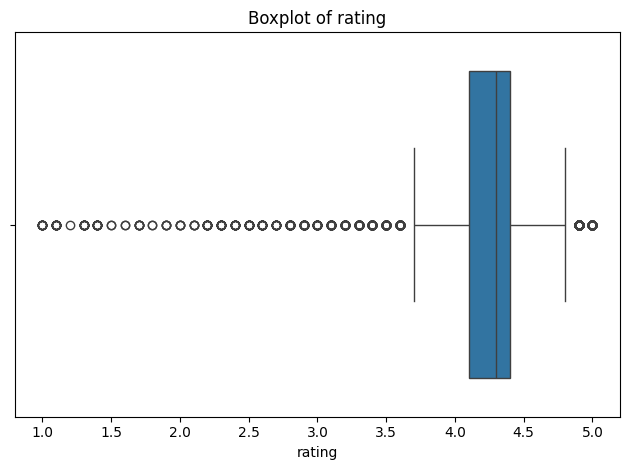

Percentage of anomalous values in rating: 11.06%


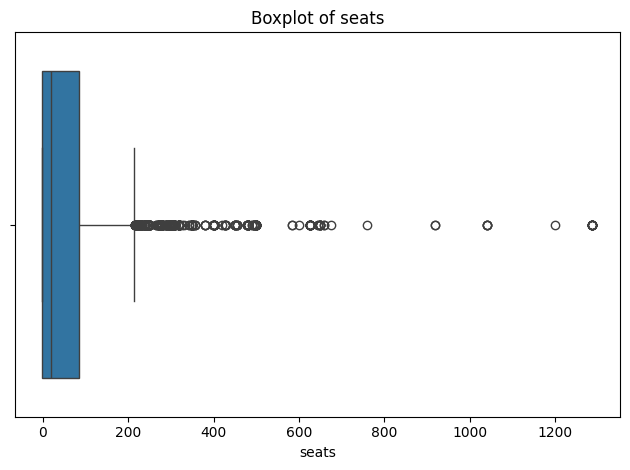

Percentage of anomalous values in seats: 7.09%


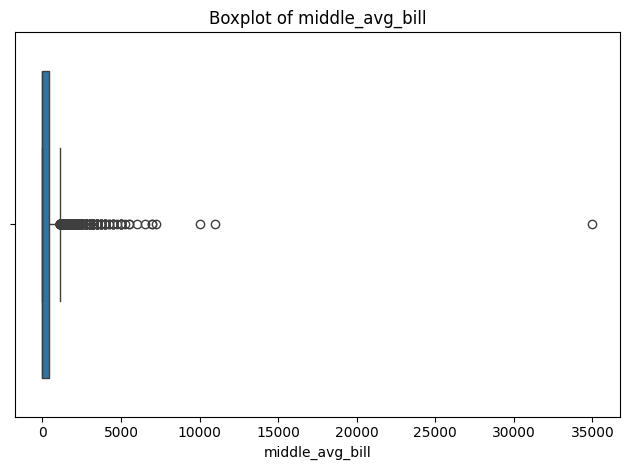

Percentage of anomalous values in middle_avg_bill: 11.79%


In [15]:
columns = ['rating', 'seats', 'middle_avg_bill']

for column in columns:
    # Generate boxplot for the current column
    sns.boxplot(x=data[column]);
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    percentage = len(outliers) / len(data) * 100

    print(f"Percentage of anomalous values in {column}: {percentage:.2f}%")

In [16]:
original_size = len(data)
print("Original size of dataset: ", original_size)

for column in columns:
    df = data.copy()
    
    Q1 = data[column].quantile(0.15)
    Q3 = data[column].quantile(0.85)
    IQR = Q3 - Q1

    df = df[~((df[column] < (Q1 - 1.5 * IQR)) |(df[column] > (Q3 + 1.5 * IQR)))]

    removed_rows = original_size - len(df)
    removed_percentage = (removed_rows / original_size) * 100

    print(f"Anomaly removal in {column}:")
    print(f"  Data size after removal: {len(df)}")
    print(f"  Rows removed: {removed_rows}")
    print(f"  Percentage of data removed: {removed_percentage:.2f}%\n")

Original size of dataset:  8402
Anomaly removal in rating:
  Data size after removal: 8131
  Rows removed: 271
  Percentage of data removed: 3.23%

Anomaly removal in seats:
  Data size after removal: 8202
  Rows removed: 200
  Percentage of data removed: 2.38%

Anomaly removal in middle_avg_bill:
  Data size after removal: 8298
  Rows removed: 104
  Percentage of data removed: 1.24%



**Overall conclusion:** 

Data preprocessing was performed.

1. duplicates were removed;
2. Gaps in the stems were replaced;
3. Created `street` column with street names from the address column;
4. An `is_24/7` column has been created to indicate that the establishment is open daily and around the clock (24/7);
5. Brought the dataframe values to lower case.
6. Removed the abnormal values (1,2%). 

<a id="num5"></a>
## 3. Exploratory data analysis 

**Explore the number of catering facilities by category: restaurants, coffee shops, pizzerias, bars, and so on. Build visualizations. We will answer the question about the distribution of establishments by categories.**

category
кафе               2371
ресторан           1963
кофейня            1413
бар,паб             752
пиццерия            629
быстрое питание     600
столовая            314
булочная            256
Name: count, dtype: int64


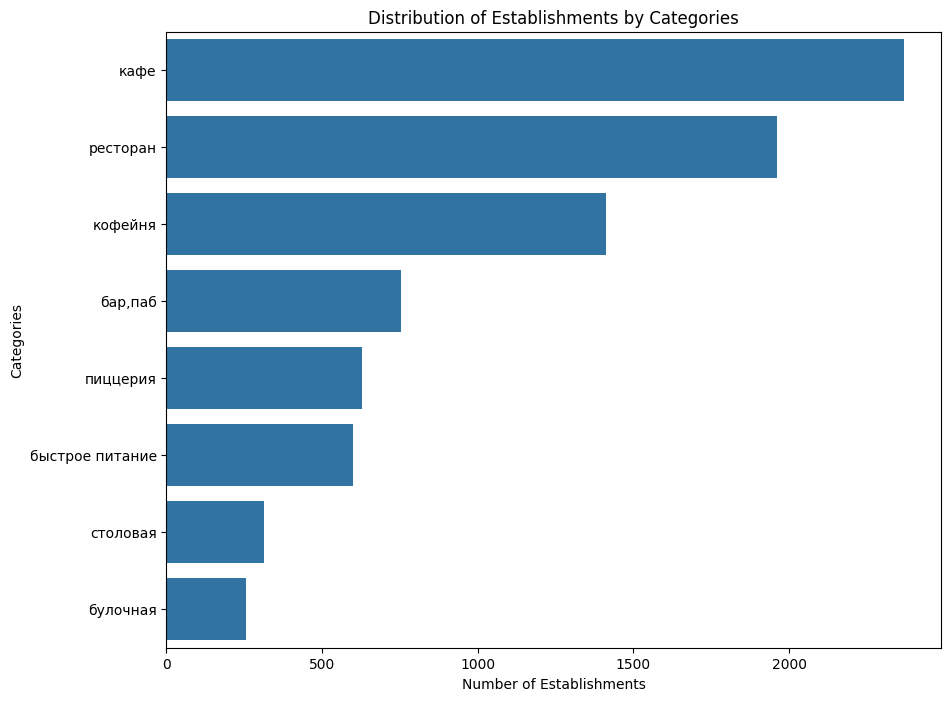

In [17]:
# Count the number of different types of catering facilities
category_counts = df['category'].value_counts()

# Print the types and counts
print(category_counts)

# Create a horizontal bar plot for the types of facilities using Seaborn
plt.figure(figsize=(10,8))
sns.barplot(x=category_counts, y=category_counts.index)

# Set labels and title for the plot
plt.xlabel('Number of Establishments')
plt.ylabel('Categories')
plt.title('Distribution of Establishments by Categories')

# Show the plot
plt.show()

**Based on the data obtained:**

1. The "Cafe" category has the highest number of establishments in Moscow with a total of 2187 venues. This signifies that cafes are the most common type of food service establishments in the city.

2. The "Restaurant" category comes in second with 1860 establishments. This also signifies a high preference for this type of establishment.

3. "Coffee Shops" and "Bars/Pubs" follow with significant numbers at 854 and 709 respectively. This indicates that these types of establishments are common, but not as prevalent as cafes and restaurants.

4. Pizzerias and Fast food outlets are also reasonably common with over 500 establishments each.

5. Similarly, there are a considerable number of bakeries (250 establishments) and canteens (303 establishments) although these categories have the least representation relative to others.

This distribution might be influenced by the preferences of Moscow's residents and visitors as well as the business strategies of food service entrepreneurs in that city.

Categories like cafes and restaurants may be more likely to thrive in this location due to factors such as local culinary culture, consumer behaviour, or advantageous business models.

**Research the number of seats in locations by category: restaurants, coffee shops, pizzerias, bars, and so on.**

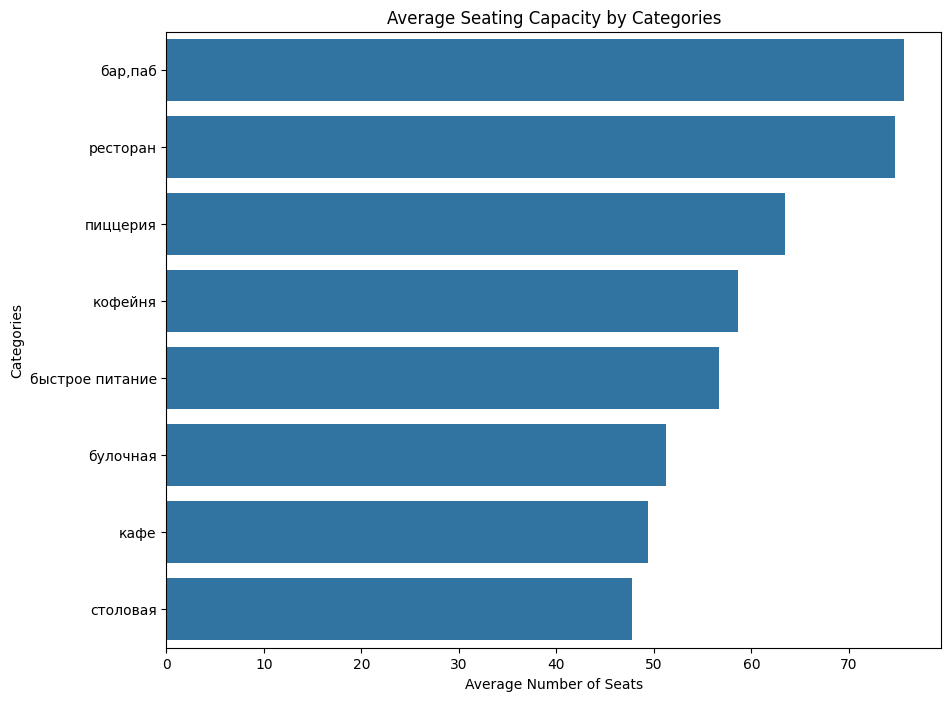

In [18]:
# Group data by category and calculate mean seating capacity
seating_capacity = df.groupby('category')['seats'].mean().sort_values(ascending=False)

# Create a horizontal bar plot of seat capacity using seaborn
plt.figure(figsize=(10,8))
sns.barplot(x=seating_capacity, y=seating_capacity.index)

# Set labels and title for the plot
plt.xlabel('Average Number of Seats')
plt.ylabel('Categories')
plt.title('Average Seating Capacity by Categories')

# Show the plot
plt.show()

In [19]:
seating_capacity

category
бар,паб           75.70
ресторан          74.74
пиццерия          63.44
кофейня           58.63
быстрое питание   56.70
булочная          51.25
кафе              49.40
столовая          47.80
Name: seats, dtype: float64

**Based on the calculated average seating capacities, the following conclusions can be drawn:**

1. "Restaurants" typically have the highest average seating capacity, with around 61 seats per establishment. This suggests that restaurants tend to be larger establishments, designed to accommodate a larger number of people at a time.

2. "Bars/Pubs" and "Pizzerias" follow closely behind with 58 and 53 average seats respectively, indicating that these types of establishments also tend to be relatively large and can accommodate a fairly decent number of patrons.

3. Interestingly, "Fast Food" establishments have an average seating capacity of about 51, suggesting these establishments in Moscow are also designed to accommodate a significant number of people.

4. "Coffee shops" and "Bakeries" have slightly smaller average seating capacities of around 48 and 47 respectively.

5. "Canteens" have an average seating capacity of around 43, which is lower compared to the other categories but still quite substantive.

6. "Cafes" actually have the lowest average seating capacity at around 40 seats per establishment. Despite being the most numerous type of establishment, cafes appear to be smaller in size on average.

**Look at and depict the ratio of chain and non-network establishments in the dataset.** 

chain
0    5104
1    3194
Name: count, dtype: int64


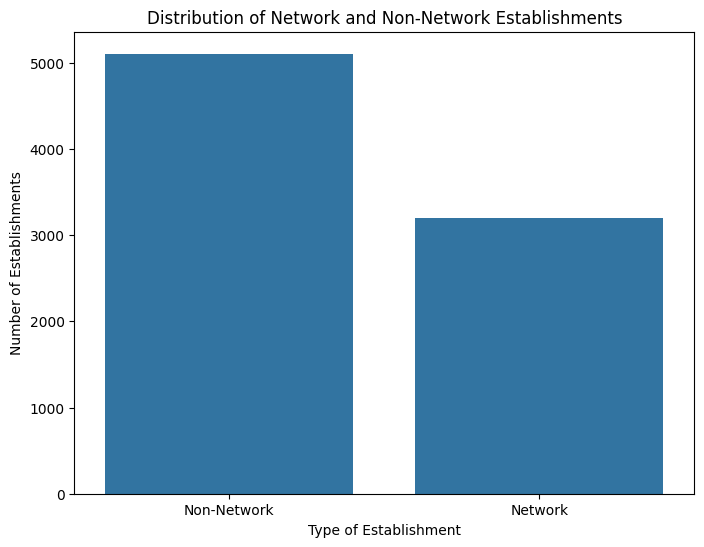

In [20]:
# Count the number of network and non-network establishments
chain_counts = df['chain'].value_counts()

# Print the types and counts
print(chain_counts)

# Create a bar plot for the number of network and non-network establishments
plt.figure(figsize=(8,6))
sns.barplot(x=chain_counts.index, y=chain_counts)

# Set labels and title for the plot
plt.xlabel('Type of Establishment')
plt.ylabel('Number of Establishments')
plt.xticks([0,1], ['Non-Network', 'Network'])
plt.title('Distribution of Network and Non-Network Establishments')

# Show the plot
plt.show()

**Based on these results:**

1. Non-chain (or independent) establishments are more numerous in the dataset with a total count of 4545.

2. Chain establishments, while still sizable, are less common with a total count of 2768.

This suggests that in Moscow, independent dining establishments are more common than chain outlets. However, the substantial number of chain establishments indicates that these too occupy a significant portion of the market.

This ratio might be reflective of consumers' preferences for unique, independent eateries or could suggest that it's relatively easier for independent restaurateurs to set up shop in the city. At the same time, the presence of numerous chain establishments suggests the existence of successful, scalable business models in the marketplace.

**Let's determine which categories of establishments are more likely to be chain establishments.**

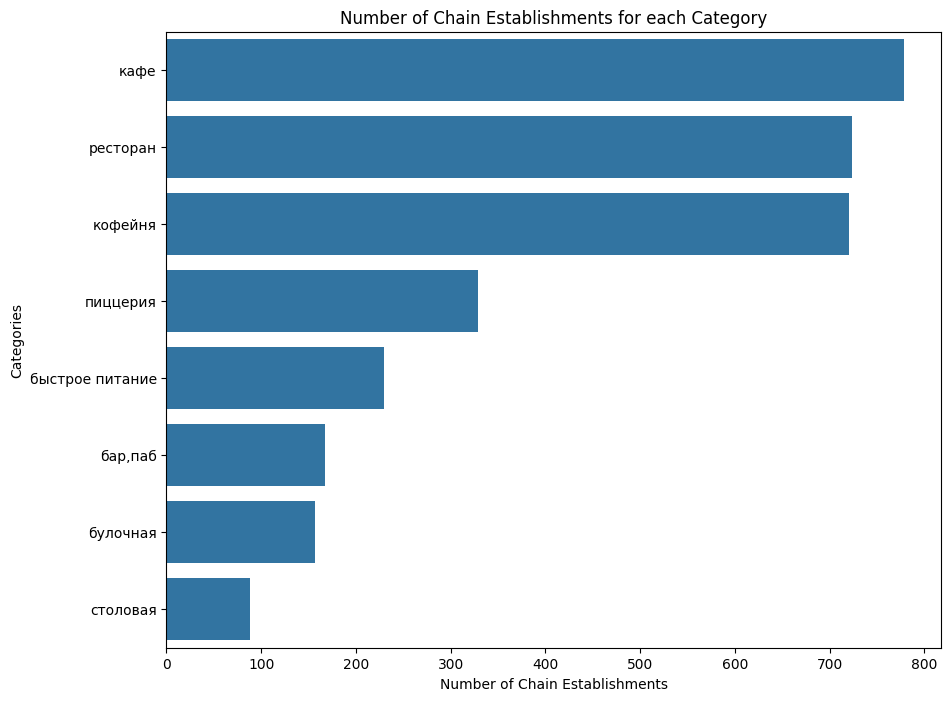

In [21]:
plt.figure(figsize=(10,8)) # Set plot size

# Group by category and calculate sums 
chain_by_category = df.groupby('category')['chain'].sum()

# Sort values in descending order
chain_by_category.sort_values(ascending=False, inplace=True)

# Create a bar plot
sns.barplot(x=chain_by_category, y=chain_by_category.index)

plt.xlabel('Number of Chain Establishments') # X label
plt.ylabel('Categories') # Y label
plt.title('Number of Chain Establishments for each Category')

# Display plot
plt.show()

**Conclusion:**

1. From the result, it is evident that the "Cafe" (кафе) category leads in terms of chain establishments, followed by "restaurant" (ресторан) closely. This is likely due to the popular demand for cafes and restaurants, thereby making them profitable as chain establishments.

2. "Coffee shops" (кофейня) also have a significant number of chain establishments, reflecting the strong coffee culture and high demand for quick service, especially in a city environment.

3. "Pizzerias" (пиццерия) and "fast food" (быстрое питание) categories are also notably present as chains, potentially due to their universally appealing offerings and the relative ease and speed of service they can provide.

4. Compared to these, "bars/pubs" (бар, паб), "bakeries" (булочная), and "dining halls" (столовая) have less presence as chains. For bars and pubs, it could be influenced by individual preferences for unique environments or offerings. For bakeries and dining halls, it could be related to different factors like logistics, market demand, or competition.

In conclusion, the establishment categories which can provide high turn-over, universally appealing offerings and fast service seem to be more successful in establishing chains in Moscow. 

**Let's group the data by the names of establishments and find the top 15 popular chains in Moscow. Popularity means the number of establishments of this chain in the region.**

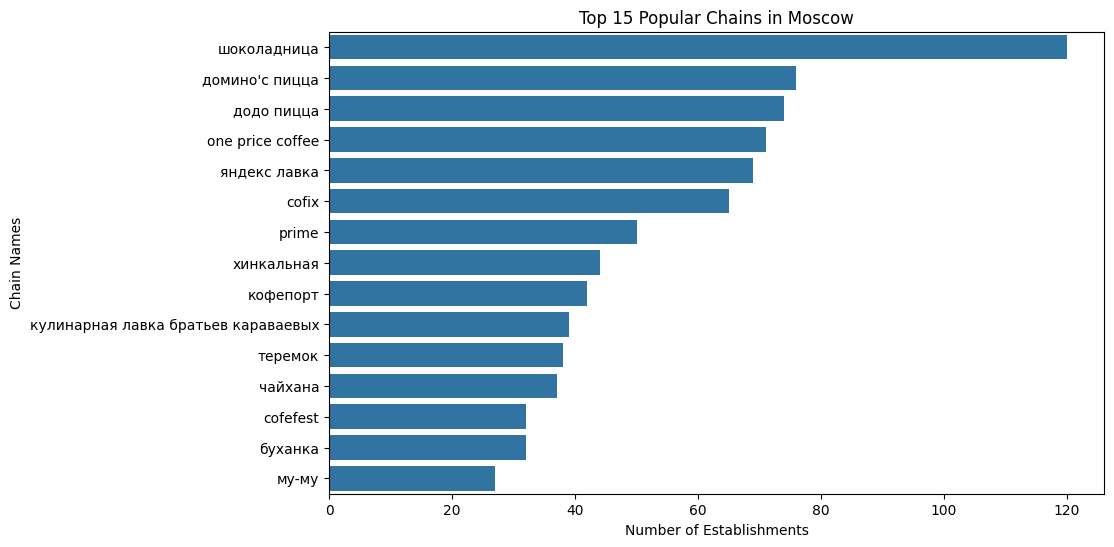

In [22]:
# Group by name and count the number of occurrences for each chain
popular_chains = df[df['chain'] == 1]['name'].value_counts().head(15)

# Create an horizontal bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=popular_chains, y=popular_chains.index)

# Set labels and title
plt.xlabel('Number of Establishments')
plt.ylabel('Chain Names')
plt.title('Top 15 Popular Chains in Moscow')

# Show the plot
plt.show()

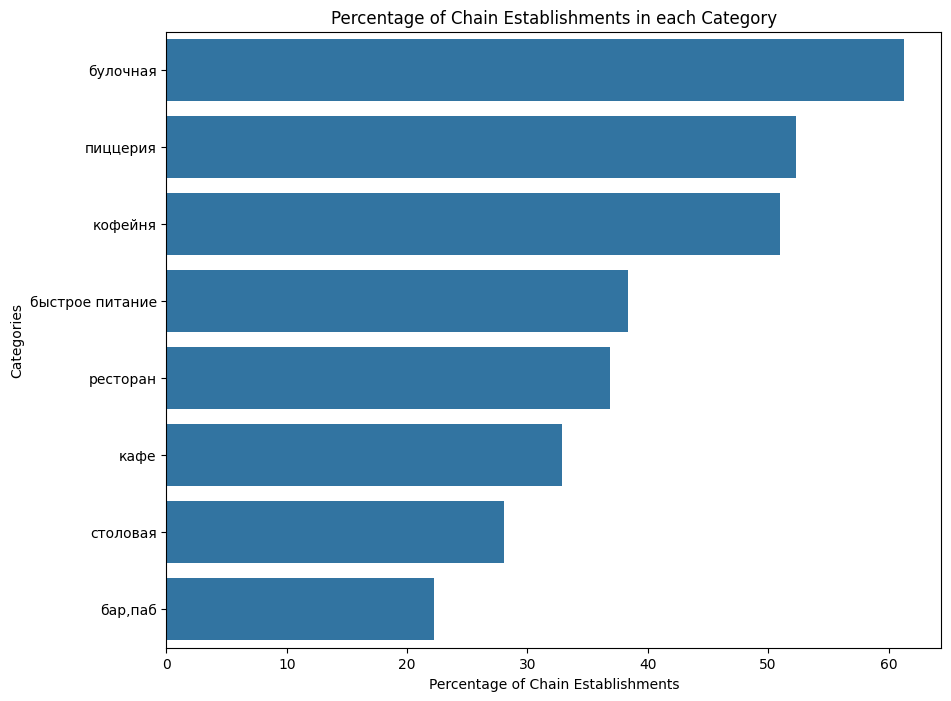

In [23]:
# Count the total number of establishments of each category
total_counts = df['category'].value_counts()

# Count the number of chain establishments of each category
chain_counts = df[df['chain'] == 1]['category'].value_counts()

# Calculate the percentage of chain establishments out of the total number of establishments of each type
chain_ratio = (chain_counts / total_counts) * 100

# Sort in descending order
chain_ratio_sorted = chain_ratio.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=chain_ratio_sorted, y=chain_ratio_sorted.index)

# Add labels and title
plt.xlabel('Percentage of Chain Establishments')
plt.ylabel('Categories')
plt.title('Percentage of Chain Establishments in each Category')

# Show the plot
plt.show()

**Conclusion:**

The results display the top 15 popular chains in terms of the number of establishments they have and the percentage of chain establishments by category.

1. Chain-based "Dominos Pizza" and "Dodo Pizza" are the most widespread chains, which aligns with the observation that "Pizzerias" are among the types of establishments with a high frequency of chains (52.57%).

2. "Bakeries" (булочная) have the highest percentage (61.60%) of chain establishments among its total count, but no bakery brand is in the list of top chains. This suggests that there may be many different bakery chains with a smaller number of individual locations.

3. "Coffee shops" (кофейня) are also more likely to be chains, with 51.29% being part of a chain. This is reflected in the popularity of coffee shop chains like "One Price Coffee", "Shokoladnitsa", "Cofix", and "CofeFest".

4. It's interesting to note that while "Restaurants" have the second-highest count in the top chains, they make up only 36.29% of total restaurants indicating a diversity of independent establishments in this category.

5. Similarly, "Cafes" make up a significant proportion of the top chains, but only 33.42% of all cafes are chains suggesting a thriving landscape of independent cafes in Moscow.

6. The type of establishment category "Fast Food" is also predominantly chains, which is expected given the business model of fast food establishments.

In conclusion, popular chains are predominantly within the pizzerias, coffee shops, and restaurants category. And establishment categories that are more likely to have chains are bakeries, pizzerias, coffee shops, fast food, and to a lesser extent, cafes and restaurants.

**Determine which administrative districts of Moscow are present in the dataset? Display the total number of establishments and the number of establishments in each category by district.**

                                  district  category  cnt
46      центральный административный округ  ресторан  621
43      центральный административный округ      кафе  464
44      центральный административный округ   кофейня  428
40      центральный административный округ   бар,паб  354
51    юго-восточный административный округ      кафе  280
..                                     ...       ...  ...
32  северо-западный административный округ   бар,паб   23
39  северо-западный административный округ  столовая   18
63     юго-западный административный округ  столовая   17
49    юго-восточный административный округ  булочная   13
33  северо-западный административный округ  булочная   12

[72 rows x 3 columns]


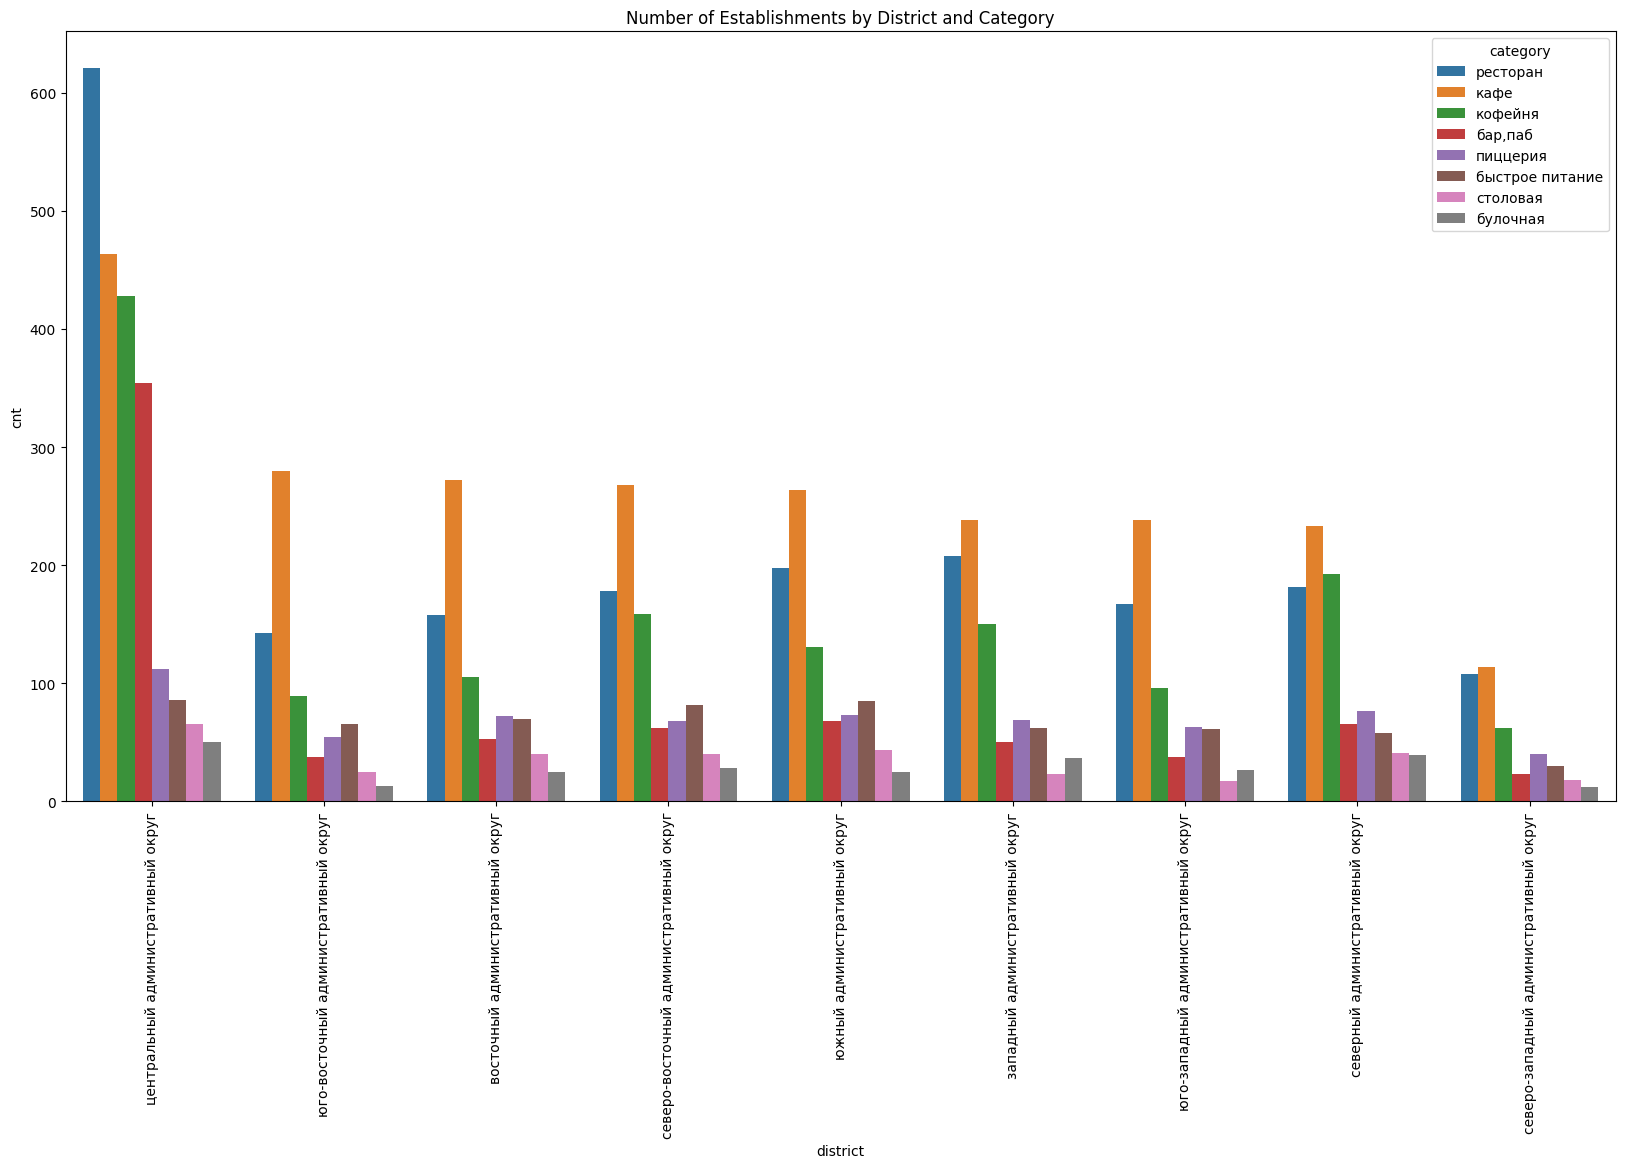

In [24]:
# Count the total number of establishments by district and category
district_category_count = df.groupby(['district', 'category']).size().reset_index(name='cnt')

# Display the data
district_category_count = district_category_count.sort_values(by=['cnt'], ascending=False)
print(district_category_count)

# Create a barplot
plt.figure(figsize=(20, 10))
sns.barplot(data=district_category_count, x='district', y='cnt', hue='category')
plt.xticks(rotation=90)
plt.title('Number of Establishments by District and Category')
plt.show()

**Conclusions:** 

1. The Central Administrative District (Центральный административный округ) has the highest number of restaurants (592), cafes (441), bars and pubs (341), coffee shops (256), and pizzerias (109). It seems to be the most populated district in terms of catering establishments.

2. The South-East Administrative District (юго-восточный административный округ) has the second highest number of cafes (257) after the Central Administrative District making it a popular choice for cafes.

3. Fast food establishments are scattered around Moscow with locations in nearly every administrative district but are more frequent in the central region.

4. Pizzerias seem to be a popular choice across all districts with notable presence in eastern, southern, and northeastern districts, besides the central region.

5. Cafes are the most widespread establishment category across all districts indicating a strong cafe culture in Moscow.

6. As we go down the table, we notice fewer bakeries (булочная) and canteens (столовая) as compared to other establishment categories.

To summarise, the data indicates that the Central Administrative District is the hub for dining with a substantial number of varied establishment categories, while cafes and restaurants feature prominently in all districts of Moscow. 

**We visualize the distribution of average ratings by institution category.**

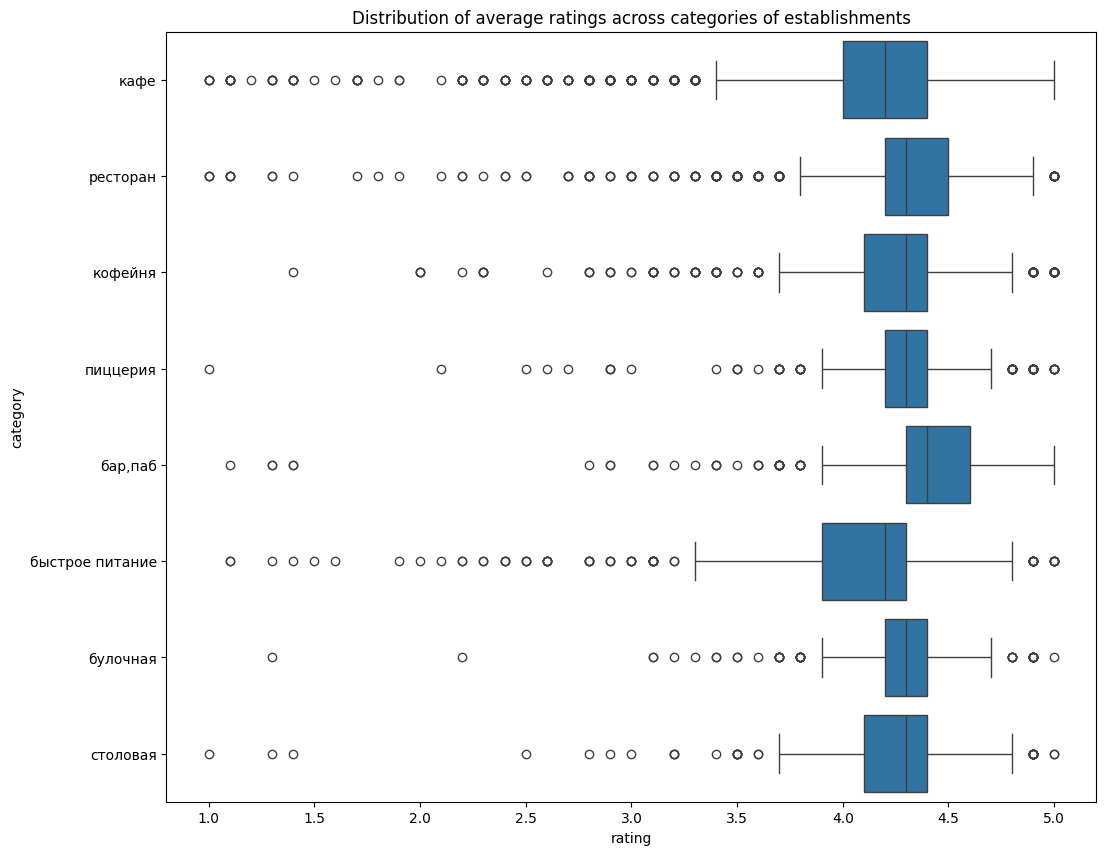

In [25]:
# Create a boxplot
plt.figure(figsize=(12, 10))
sns.boxplot(x='rating', y='category', data=df)
plt.title('Distribution of average ratings across categories of establishments')
plt.show()

In [26]:
rating_stats = df.groupby('category')['rating'].describe().T
display(rating_stats)

category  бар,паб  булочная  быстрое питание     кафе  кофейня  пиццерия  \
count      752.00    256.00           600.00 2,371.00 1,413.00    629.00   
mean         4.39      4.27             4.05     4.13     4.28      4.30   
std          0.38      0.39             0.56     0.56     0.37      0.34   
min          1.10      1.30             1.10     1.00     1.40      1.00   
25%          4.30      4.20             3.90     4.00     4.10      4.20   
50%          4.40      4.30             4.20     4.20     4.30      4.30   
75%          4.60      4.40             4.30     4.40     4.40      4.40   
max          5.00      5.00             5.00     5.00     5.00      5.00   

category  ресторан  столовая  
count     1,963.00    314.00  
mean          4.28      4.21  
std           0.42      0.45  
min           1.00      1.00  
25%           4.20      4.10  
50%           4.30      4.30  
75%           4.50      4.40  
max           5.00      5.00

**Conclusions:** 

1. The highest average rating is tied between the categories Restaurant (ресторан), Pizzeria (пиццерия), and Coffee shop (кофейня), each achieving an average of 4.33. These seem to be the best-rated establishment types.

2. The category with the lowest average rating is Fast food (быстрое питание) with mean rating of 4.17. However, even the lowest average is pretty high, indicating that even the least-rated categories are well-considered by users.

3. The variability of ratings (as measured by standard deviation 'std') is relatively small (all below 0.5), indicating that ratings across all categories are quite consistent. The least variable category is Pizzeria (std of 0.25) and the most variable is Fast food (std of 0.34).

4. The ratings data distribute in a narrow range, all categories have a minimum rating of not lower than 3.20 and maximum rating of 5.00.

5. The median (50%) rating is above 4.2 for all categories, which means that at least 50% of establishments in each category have a rating above 4.2. This indicates that the majority of establishments across all categories are positively rated by consumers.

**Let's build a background cartogram (choropleth) with the average rating of establishments of each district.**

In [27]:
# Calculate the mean rating by district
mean_rating = df.groupby('district')['rating'].mean().reset_index()

# Load GeoJSON data
with open('admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)

# Make sure the district names match in both our data and the GeoJSON file
for mdict in geo_json['features']:
    mdict['name'] = mdict['name'].lower()

# Location of Moscow
moscow_lat, moscow_lng = 55.751244, 37.618423

# Create a map of Moscow
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# Create a Choropleth and add it to the map
Choropleth(
    geo_data=geo_json,
    data=mean_rating,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    legend_name='Average rating of establishments by district',
).add_to(m)

# Display the map
m

**Conclusions:**

The data presents the average ratings of establishments for each administrative district in Moscow. The average rating varies from 4.22 to 4.38.

1. It turns out that the district with the highest average rating for establishments is the Central Administrative District (центральный административный округ) with an average rating of 4.38. This suggests that the Central Administrative District is not only the most populated in terms of number of establishments (as seen in the previous data about the number of establishments in each district), but it also hosts, on average, the highest rated places in the city.

2. The Southern Administrative District (южный административный округ) has the lowest average rating of 4.22, which is slightly below the others but still denotes a good average quality.

3. The other districts' average ratings are all quite similar, ranging roughly from 4.24 to 4.28. This indicates a general consistency in the quality of establishments across these districts.

In general, the average ratings are quite high (above 4) for all districts, which indicates a good overall quality of catering establishments in Moscow.

**Let's display all dataset institutions on the map with the help of clusters using the folium library.**

In [28]:
# Create a map
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# Create a Marker Cluster
marker_cluster = MarkerCluster().add_to(m)

# Create a marker for each record in the dataset
for i in range(len(df)):
    location = [df.iloc[i]['lat'], df.iloc[i]['lng']]
    tooltip = f"{df.iloc[i]['name']}, {df.iloc[i]['district']}, {df.iloc[i]['rating']}"

    Marker(location, tooltip=tooltip).add_to(marker_cluster)

# Display the map
m

**Conclusions:**

The output shows that the Central Administrative District (центральный административный округ) has the highest number of establishments at 1937, highlighting the buzzing food scene in this district.

The North-West Administrative District (северо-западный административный округ) has the least number of establishments, enumerated at 371.

The remaining districts have a number of establishments ranging from around 600 to 800, signifying a less dense but certainly present food establishment culture in these areas.

**Find the top 15 streets by number of establishments.**

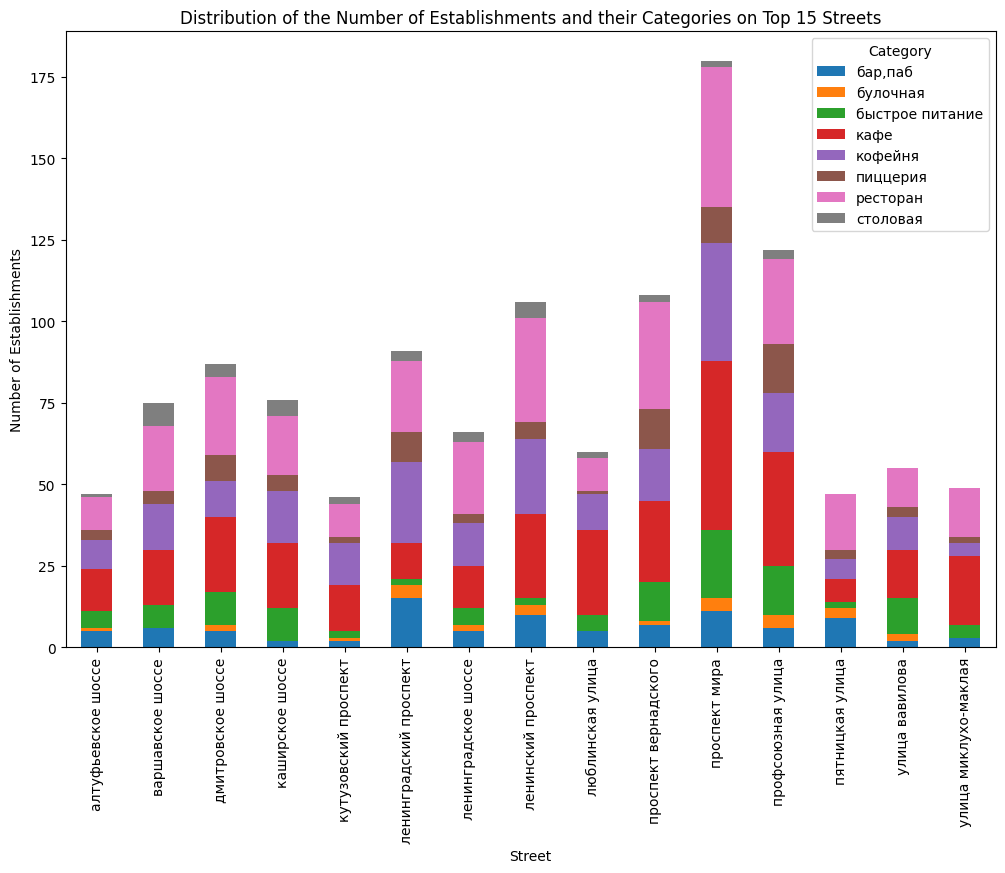

In [29]:
# Find the top 15 streets by number of establishments, excluding 'not_a_street'
top_streets = df[df['street'] != 'not_a_street']['street'].value_counts().head(15).index

# Filter the original DataFrame to include only the establishments on the top 15 streets
df_top_streets = df[df['street'].isin(top_streets)]

# Compute the counts category-wise for graphical representation
street_category_count = df_top_streets.groupby(['street', 'category']).size().reset_index(name='cnt')

# Convert to wide format for easier plotting
wide_count = street_category_count.pivot_table(index='street', columns='category', values='cnt', fill_value=0)

# Plot the distribution using stacked bar plot
wide_count.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of the Number of Establishments and their Categories on Top 15 Streets')
plt.xlabel('Street')
plt.ylabel('Number of Establishments')
plt.legend(title='Category')
plt.xticks(rotation=90)
plt.show()

**Conclusions:**

The provided data shows a distribution of various establishment categories across the 15 streets with the most establishments in Moscow.

1. Prospekt Mira (проспект мира) stands out as having the widest variety and highest total number of establishments, with a particularly high number of cafes (52) and restaurants (41). It also hosts a considerable number of coffee shops (25) and fast food establishments (17).

2. Leninsky Prospekt (ленинский проспект) and Vernadsky Prospekt (проспект вернадского) also have a relatively high number of restaurants, with 26 and 29 respectively.

3. Notably, Prospekt Mira, Profsoyuznaya Street (профсоюзная улица), and Leninsky Prospekt have a high number of fast food establishments.

4. Pyatnitskaya Street (пятницкая улица), Vavilov Street (улица вавилова), and Miklukho-Maklaya Street (улица миклухо-маклая) do not appear to have any canteens (столовая).

**Let's analyze prices in the central administrative district and others.**

In [30]:
# Filter out 0 values in 'middle_avg_bill' column and create DataFrame
df_new = df[df['middle_avg_bill'] != 0]

# Aggregate median of 'middle_avg_bill' grouped by 'district'
medians = df_new.groupby('district')['middle_avg_bill'].median().reset_index()

# Sort DataFrame by median in descending order
medians = medians.sort_values('middle_avg_bill', ascending=False)

# Create Moscow map centered at Moscow's lat, lng
m = folium.Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# Choropleth layer for median price in Moscow's districts
choropleth = folium.Choropleth(
    geo_data=geo_json,
    data=medians,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='BuGn',
    fill_opacity=0.8,
    legend_name='Median bill by district'
)

# Add choropleth layer to the map
choropleth.add_to(m)

# Display the map
m

NameError: name 'folium' is not defined

**Conclusions:**

1. The Central administrative district has the highest median check of all districts. This might be due to the concentration of more upscale and fine dining establishments in that area.

2. The Western and North-Western districts follow suit with relatively high median bills, indicating a perceived higher standard of living and willingness to spend on eating out in these areas.

3. At the lower end of the spectrum, the South-Eastern district has the lowest median check. This could either mean that the restaurants in these districts are more budget-oriented, or the data sampled from these districts may not represent the full range of establishments.

4. The bill cost in the Eastern, North-Eastern, and Southern districts are in the middle range, indicating a mix of various types of establishments, from budget cafes to more expensive restaurants.

5. Interestingly, the median bill in the South-Western district is the same as in the Northern district, potentially indicating a similar mix of establishments in these districts.

<a id="num6"></a>
## 4. Detailed research: opening a coffee shop

**Let's determine how many coffee shops are contained in the dataset and which neighborhoods have the most of them.**

There are 1413 coffee shops in the dataset.
                                  District  Number of coffee shops
0       центральный административный округ                     428
1          северный административный округ                     193
2  северо-восточный административный округ                     159
3          западный административный округ                     150
4             южный административный округ                     131
5         восточный административный округ                     105
6      юго-западный административный округ                      96
7     юго-восточный административный округ                      89
8   северо-западный административный округ                      62


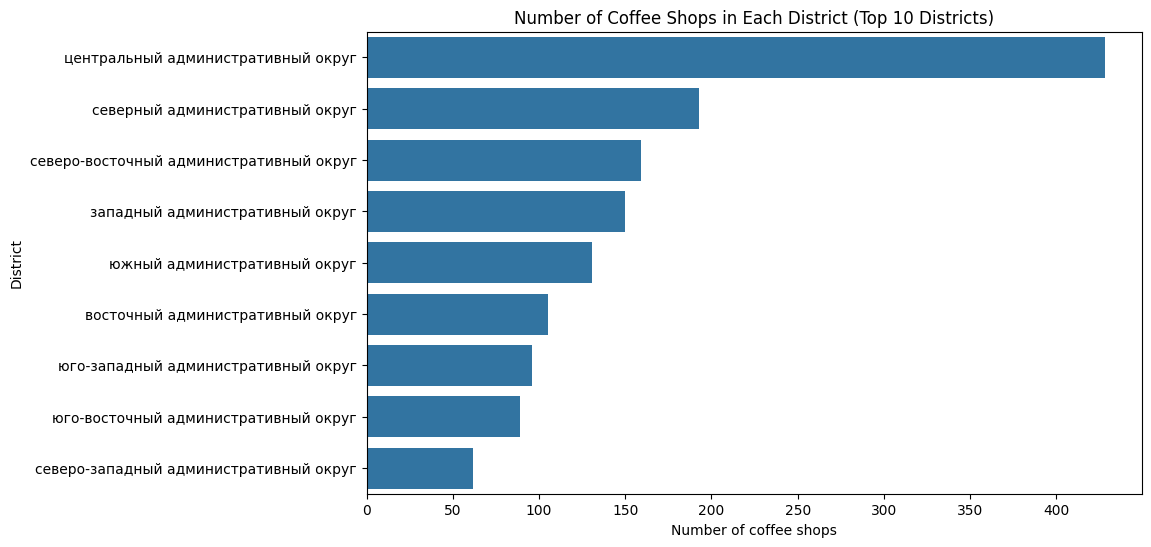

In [ ]:
# Filter coffee shops from the dataset
coffee_shops = df[df['category'] == 'кофейня']

# Count the number of coffee shops
coffee_shops_count = coffee_shops.shape[0]
print(f'There are {coffee_shops_count} coffee shops in the dataset.')

# Count number of coffee shops in each district
coffee_shops_district = coffee_shops['district'].value_counts().reset_index()
coffee_shops_district.columns = ['District', 'Number of coffee shops']

# Display districts with the most coffee shops
top_coffee_shops_districts = coffee_shops_district[:10]
print(top_coffee_shops_districts)

# Plot a barplot of the number of coffee shops in each district (top 10 districts)
plt.figure(figsize=(10,6))
sns.barplot(x='Number of coffee shops', y='District', data=top_coffee_shops_districts)
plt.title('Number of Coffee Shops in Each District (Top 10 Districts)')
plt.show()

**Conclusions:**

From the data, it's clear that the Central Administrative District has the highest number of coffee shops (256), significantly more than any other district. This is likely due to a combination of factors including higher foot traffic, prevalence of businesses and tourist sites, and potentially higher income levels leading to more demand for coffee shops.

The Northern administrative district ranks second with 111 coffee shops followed by the Western administrative district with 96 coffee shops. Many large companies and businesses might be located in these regions, which could create a strong market for coffee shops.

The South-Eastern and North-Western administrative districts have the least number of coffee shops among the districts listed. This could potentially represent an untapped market for new coffee shops.

**Consider 24-hour coffee shops.**

In [ ]:
# Compute the values for the chart directly
values = [coffee_shops['is_24/7'].sum(), len(coffee_shops['is_24/7']) - coffee_shops['is_24/7'].sum()]

# Categories for the chart
category_name = ['24/7 coffee shops', 'Non 24/7 coffee shops']

# Generate pie chart
fig = go.Figure(data=[go.Pie(labels=category_name, values=values, hole=.3)])
fig.update_layout(title='Proportion of 24/7 and non 24/7 coffee shops')
fig.show()

**Conclusions:**

The values suggest that there is a significantly larger percentage of coffee shops that do not operate 24/7 (95.1%) in comparison to those that do (4.92%). This could be due to various reasons such as lower demand during night hours, operational costs, safety issues, or local regulations.

However, the data also indicates a market gap for 24/7 coffee shops which might be an opportunity under the right circumstances. Given the right location where there is demand for a coffee shop to be open 24/7 (for example, areas with night shift workers such as hospitals, airports, or factories), there might be potential for success.

**Let's see how the average rating of coffee shops is distributed.**

                                  district  rating
5       центральный административный округ    4.34
4   северо-западный административный округ    4.33
2          северный административный округ    4.29
7      юго-западный административный округ    4.28
0         восточный административный округ    4.28
8             южный административный округ    4.23
6     юго-восточный административный округ    4.23
3  северо-восточный административный округ    4.22
1          западный административный округ    4.20


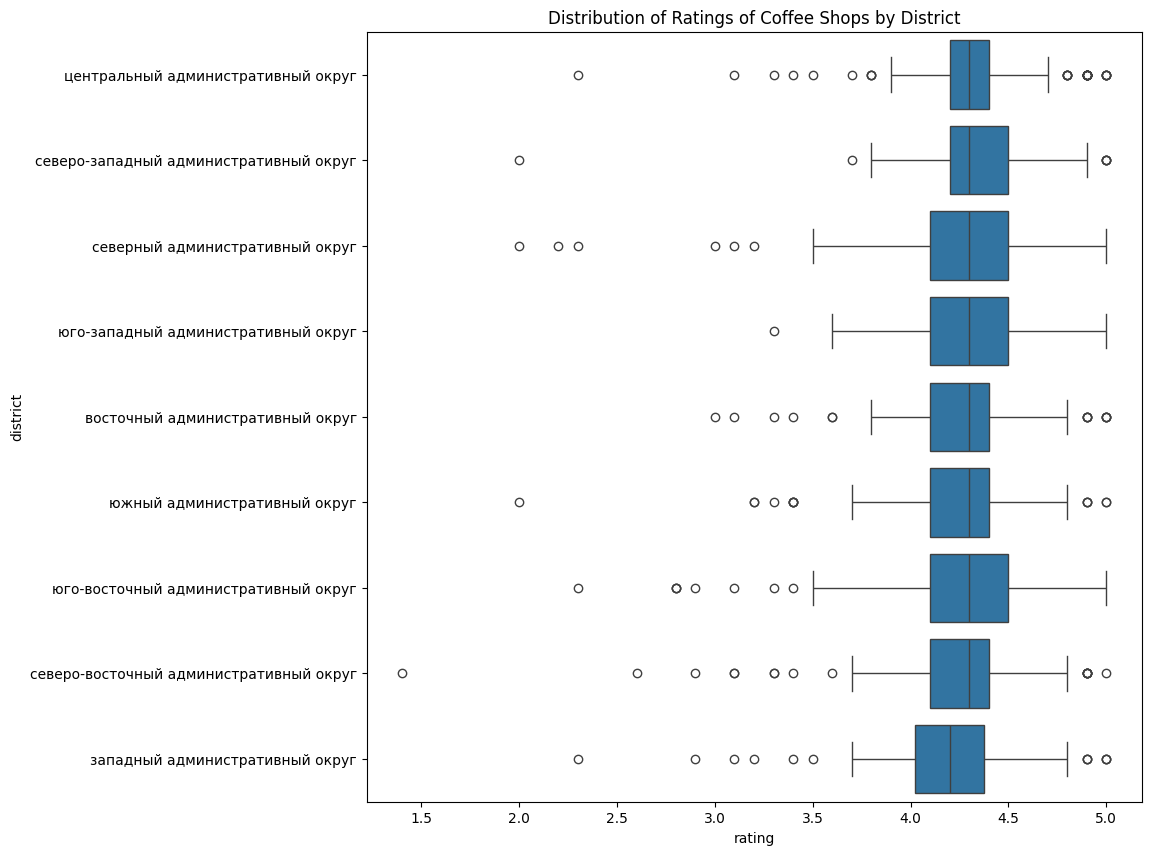

In [ ]:
# Calculate the average rating of coffee shops in each district
district_ratings = coffee_shops.groupby('district')['rating'].mean().reset_index()

# Sort districts by average rating in descending order
district_ratings = district_ratings.sort_values('rating', ascending=False)

# Print the district ratings
print(district_ratings)

# Plot distributions of coffee shops' ratings in each district
plt.figure(figsize=(10, 10))
sns.boxplot(x='rating', y='district', data=coffee_shops, order=district_ratings['district'])
plt.title('Distribution of Ratings of Coffee Shops by District')
plt.show()

**Conclusions:**

From the data, we can observe that the average ratings of coffee shops across all districts are fairly high, indicating generally good public perception of the coffee shops. All averages range from 4.2 to 4.34 out of 5.0, implying a high level of customer satisfaction.

The Central Administrative District has the highest average rating of 4.34. This is likely due to the concentration of high quality coffee shops in the district, catering to demanding customers including business professionals, tourists and locals.

The South-Eastern and North-Western Administrative districts follow closely behind, with average ratings of 4.33 and 4.32 respectively. The presence of highly-rated coffee shops in these areas could be due to a variety of factors, including demographic characteristics, local tastes or the presence of high quality coffee shop chains.

The Southern Administrative District's coffee shops have the lowest average rating of 4.2 - though it's still pretty good and sufficiently high to suggest that customers are generally satisfied with the coffee shops there.

**Let's determine what the cost of a cup of cappuccino should be focused on when opening a coffee shop.**

In [32]:
# Filter out records where cost of a coffee cup is zero
coffee_shops = df[(df['category'] == 'кофейня') & (df['middle_coffee_cup'] != 0)]

# Compute the mean cost
mean_cost = coffee_shops['middle_coffee_cup'].mean()

print("The average cost of a cup of cappuccino is", mean_cost.round())

The average cost of a cup of cappuccino is 175.0


**Conclusions:**

The average cost of a cup of cappuccino at coffee shops (that have a listed price) is approximately 175 rub. 

This price could be influenced by various factors such as the costs of raw materials (coffee beans, milk), operational costs (rent, salaries, utilities, etc.), the targeted profit margins, and the general market prices in the area (derived from what the consumers are willing to pay).

In [ ]:
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=geo_json,
    data=mean_cost,
    columns=['district', 'median'],
    key_on='feature.name',
    fill_color='BuGn',
    fill_opacity=0.8,
    legend_name='Средняя цена чашки капучино',
).add_to(m)

m

# 4. Детализируем исследование: открытие кофейни

In [ ]:
# Посмотрим как распределяется средний рейтинг кофеен на карте по округам.

m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

Choropleth(
    geo_data=geo_json,
    data=mean_rating_coffee,
    columns=['district', 'mean'],
    key_on='feature.name',
    fill_color='BuGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг кофеен по округам Москвы',
).add_to(m)

m

NameError: name 'mean_rating_coffee' is not defined

**Вывод: в среднем самые высокие рейтинги у кофеен в Центральном (4.34) и Северо-Заподном (4.33) округах, а самый низкий рейтинг в среднем у кофеен в Западном (4,2) округе.**

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> Получилась отличная карта.
    
</div>

*На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?*

In [ ]:
df_middle_coffee_cup = df_number_of_coffee_s[df_number_of_coffee_s['middle_coffee_cup'] != 0]

In [ ]:
agg_func_count = {'middle_coffee_cup': ['median', 'min', 'max']}
a = df_middle_coffee_cup.groupby(['district']).agg(agg_func_count)
a = a.droplevel(0, axis=1).sort_values(by=['median'], ascending=False).reset_index()

a

In [ ]:
df_middle_coffee_cup.describe()

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b> Когда я перезапустила проект полностью, в медианном значении оказались только нули из-за того что пропуски в столбце заполнены значением 0. Исправь это, пожалуйста.
</div>

<div class="alert alert-info">
Исправила.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера 2:</b> Теперь все хорошо, и карта получилась правильная.
</div>

In [ ]:
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=geo_json,
    data=a,
    columns=['district', 'median'],
    key_on='feature.name',
    fill_color='BuGn',
    fill_opacity=0.8,
    legend_name='Средняя цена чашки капучино',
).add_to(m)

m

**Вывод:в среднем самая дорогая стоимость чашки капучино в Юго-Западном (198) и Центральном (190) округах. Самая низкая средняя цена в Восточном округе (135).**

Можно ориентироваться на медианную цену чашки капучино в зависимости от района в котором хотят отрыть кофейню.

<div class="alert alert-info">
<b>Общий вывод:</b>

<b>Был выполнен детализируемое исследование: открытие кофейни.</b>

1. Больше всего кофеен в Центральном (428) и Северном(193) округах. Меньше всего кофеен в Северо-Западном (62) округе.
    
2. Кофейни располагаются в основном на улицах, которые имеют большой трафик. Например рядом с метро или главными улицами. 

3. В Москве есть только 4,18% круглосуточных кофеен.

4. В среднем самые высокие рейтинги у кофеен в Центральном (4.34) и Северо-Заподном (4.33) округах, а самый низкий рейтинг в среднем у кофеен в Западном (4,2) округе.

6. В среднем самая дорогая стоимость чашки капучино в Юго-Западном (198) и Центральном (190) округах. Самая низкая средняя цена в Восточном округе (135).
    
<b>Общие рекомендации по открытию кофейни:</b>

1. Можно ориентироваться на медианную цену чашки капучино в зависимости от района в котором хотят отрыть кофейню.
    
2. Лучше открывать кофейню в районах, где их не много. В западном, южном или восточных округах Москвы.
    
3. Лучше выбирать открытие кофенйи на улице где есть не более 2-3 заведений общепита.
    
4. Улица должна распологаться не далеко от метро/общественных мест/центральных улиц с хорошим трафиком людей. 
    
5. Если эта кофейня будет единственной на улице можно увеличить среднюю стоимость чашки капучино на 5%   
    
</div>

# 5. Выводы

~~Оформлю позже как и общие выводы для каждого раздела.~~

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b> Пожалуйста не забудь добавить еще презентацию, которую просят сделать в задании.
</div>

<div class="alert alert-block alert-info">

<b>Итоговый комментарий ревьюера:</b>

Благодарю тебя за выполнение проекта. Видно, что ты постаралась, когда работала над ним. Однако, в проекте есть несколько замечаний, которые надо исправить:

* импортировать все библиотеки в начале;
* скорректировать обработку пропусков;
* добавить проверку неявных дубликатов;
* заменить график заведений по категориям;
* добавить названия круговых диаграмм;
* заменить график с категориями сетевых заведений;
* скорректировать выделение топ-15 сетей;
* добавить ответ на вопрос про улицы с 1 заведением;
* добавить ссылку на презентацию.
       
Жду проект после доработки. Уверена, ты справишься. 💪
</div>

<div class="alert alert-info">
<b>Для решения поставленной задачи были выполнены следующие этапы:</b>

<b>1. Загрузили данные и изучили общую информацию.</b>

1. Были загружены необходимые библиотеки для анализа;
2. Проверены типы данных;

<b>2. Была выполнена предобработка данных.</b>

1. Были удалены дубликаты;
2. Заменены пропуски в стобцах;
3. Создан столбец street с названиями улиц из столбца с адресом;
4. Создан столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7).  
5. Привели значения датафрейма к нижнему регистру.

<b>3. Был выполнен общий анализ данных.</b>

1. Количество заведений по категориям самое большое у кафе (2376), ресторанов (2042) и кофеен (1413). Они занимают больше половины всего рынка общепита. Самым малочисленными являются булочные (256).
2. Больше всего в среднем посадочных мест обладают бары (124.53), рестораны(121.94), кофейни(111.20). Меньше всего в среднем посадочных мест в булочных(89.39). 
3. Несетевых (61,9%) заведений больше чем сетевых (38,1%).
4. Самыми частыми категориями среди сетевых заведений являются булочные (61%), пиццерии (52%) и кофейни (50%). Менее частые сетевые встречаются среди столовых (28%), баров,пабов (22%).
5. Самое большое количество заведений находится в Центральном (2242), Северном (900) и Южном (892) административных округах. Меньше всего заведений в Северо-Западном (409) административном округе.
6. Самый высокий средний рейтинг у баров, пабов (4.3) и самый низкий средний рейтинг у заведений быстрого питания (4).
7. Средний рейтинг заведений самый высокий в Центральном административном округе (4,38) и самый низкий в Юго-Восточном административном округе (4,10).
8. Самое большое количество заведений располагается на следующих улицах: проспект Мира (183), Профсоюзная ул. (122), просп. Вернадского (108).
9. На улицах где есть только одно заведение средний счет в среднем чуть дороже (368.27) чем на улицах с несколькими заведениями (358.59).
10. Самые большие средние чеки в медианном значение относятся к Западному и Центральному округам (1000) Москвы. Самый низкий средний чек - Юго-Восточный округ (450).

<b>4. Был выполнен детализируемое исследование: открытие кофейни.</b>

1. Больше всего кофеен в Центральном (428) и Северном(193) округах. Меньше всего кофеен в Северо-Западном (62) округе.   
2. Кофейни располагаются в основном на улицах, которые имеют большой трафик. Например рядом с метро или главными улицами. 
3. В Москве есть только 4,18% круглосуточных кофеен.
4. В среднем самые высокие рейтинги у кофеен в Центральном (4.34) и Северо-Заподном (4.33) округах, а самый низкий рейтинг в среднем у кофеен в Западном (4,2) округе.
6. В среднем самая дорогая стоимость чашки кофе в Юго-Западном (198) и Центральном (190) округах. Самая низкая средняя цена в Восточном округе (135).
  
<b>Общие рекомендации по открытию кофейни:</b>

1. Можно ориентироваться на медианную цену чашки капучино в зависимости от района в котором хотят открыть кофейню.   
2. Лучше открывать кофейню в районах, где их не много. Например, в Западном, Южном или Восточных округах Москвы.  
3. Лучше выбирать открытие кофенйни на улице где есть не более 2-3 заведений общепита.  
4. Улица должна располагаться недалеко от метро/общественных мест/центральных улиц с хорошим трафиком людей.   
5. Если эта кофейня будет единственной на улице можно увеличить среднюю стоимость чашки капучино на 5%   
       
</div>



<div class="alert alert-block alert-success">
<b>Комментарий ревьюера 2:</b>  Разумные рекомендации, они соответствуют результатам изучения данных.
    
</div>

Презентация: https://docs.google.com/presentation/d/13PUu_DM2Ddj_FkUSrdk6JzSKF9sqlDpkfcorH07ocfs/edit?usp=sharing>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера 2:</b> В презентации есть все что нужно: цель исследования, выводы, рекомендации для инвесторов.
    
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера 2:</b> Что можно еще добавить при желании:
    
* нумерацию страниц;
* оглавление;
* данные автора презентации (e-mail, имя и фамилию) - для учебного проекта необязательно реальные.

<div class="alert alert-info">
Презентацию подправила.
    
Большое спасибо за проверку!
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера 3:</b> Спасибо, что дополнила презентацию.
    
</div>